In [2]:
using CSV, DataFrames, BioSequences, FASTX, Plots, Plots.Measures, Serialization, Polynomials

In [35]:
function conf_interval(profile, searchspace)
    ml, idx = findmax(profile)
    uconf = idx
    while (profile[uconf] > ml - 1.92) && (uconf < length(profile))
        uconf += 1
    end
    u=lconf = idx
    while (profile[lconf] > ml - 1.92) && (lconf > 1)
        lconf -= 1
    end
    mle = searchspace[idx]
    mle, searchspace[uconf] - mle, mle - searchspace[lconf]
end

conf_interval (generic function with 1 method)

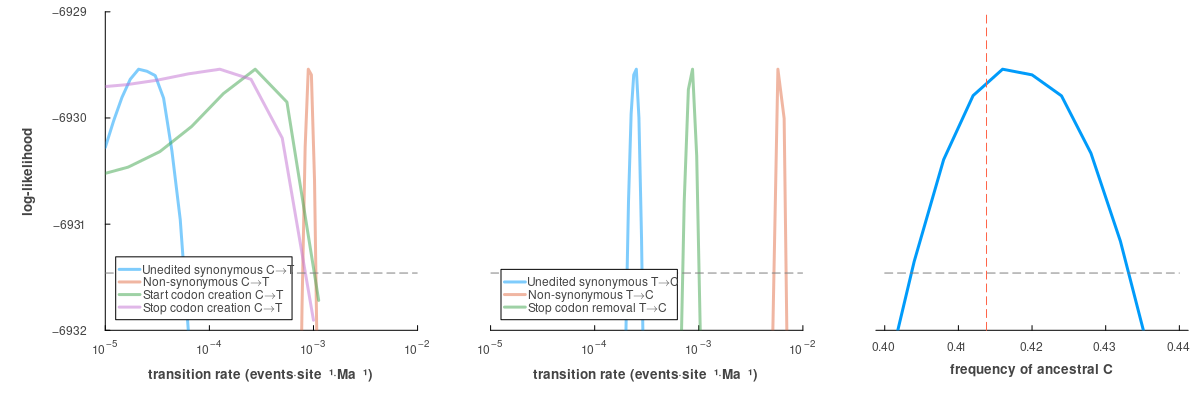

GKS: glyph missing from current font: 8315
GKS: glyph missing from current font: 8315
GKS: glyph missing from current font: 8315
GKS: glyph missing from current font: 8315
GKS: glyph missing from current font: 8315
GKS: glyph missing from current font: 8315
GKS: glyph missing from current font: 8315
GKS: glyph missing from current font: 8315


In [78]:
mt_profiles = deserialize("fully_partitioned_mt_zoom.bin")

labels = ["Unedited synonymous T→C","Unedited synonymous C→T","Non-synonymous C→T","Start codon creation C→T","Stop codon creation C→T","Non-synonymous T→C","Stop codon removal T→C"]

resolution = 11
ancestral = range(0.40,0.44; length = resolution)
searchspaces = Base.LogRange[]
push!(searchspaces, logrange(10^-3.7, 10^-3.45, resolution))
push!(searchspaces, logrange(10^-5.0, 10^-4.2, resolution))
push!(searchspaces, logrange(10^-3.2, 10^-2.9, resolution))
push!(searchspaces, logrange(10^-6.0, 10^-2.95, resolution))
push!(searchspaces, logrange(10^-6.0, 10^-3.0, resolution))
push!(searchspaces, logrange(10^-2.6, 10^-2.0, resolution))
push!(searchspaces, logrange(10^-3.3, 10^-2.9, resolution))

plot(;legendposition = :bottomleft, tickfontsize = 8, ylims = (-6932,-6929), layout = (1, 3), size = (1200, 400),
    xguide = "transition rate (events⋅site⁻¹⋅Ma⁻¹)", fontfamily = "Helvetica", guidefontfamily = "Helvetica Bold", guidefontsize = 9, grid = false, bottom_margin = 10mm)
plot!(; subplot = 1, xscale = :log10, xlims = (1e-5, 1e-2), yguide = "log-likelihood", left_margin = 10mm)
plot!(; subplot = 2, xscale = :log10, xlims = (1e-5, 1e-2), yaxis = false)
plot!(; subplot = 3, yaxis = false)
for d in 1:ndims(mt_profiles)-1
    subplot = 1
    if d ∈ [1,6,7]
        subplot = 2
    end
    plot!(searchspaces[d], maximum.(eachslice(mt_profiles, dims = d)); subplot=subplot, lw = 3, alpha = 0.5, label = labels[d])
end
plot!([1e-5, 1e-2],[maximum(mt_profiles) - 1.92, maximum(mt_profiles) - 1.92]; ls = :dash, color = :gray, label = false)
plot!([1e-5, 1e-2],[maximum(mt_profiles) - 1.92, maximum(mt_profiles) - 1.92]; subplot=2, ls = :dash, color = :gray, label = false)

d = 8
domain = range(0.40,0.44; length = resolution)
plot!(domain, maximum.(eachslice(mt_profiles, dims = d)); subplot = 3, lw = 3, xguide = "frequency of ancestral C", label = false)
plot!([0.40,0.44],[maximum(mt_profiles) - 1.92, maximum(mt_profiles) - 1.92]; subplot = 3, ls = :dash, color = :gray, label = false)
vline!([0.4138185168125288]; subplot = 3, ls = :dash, color = :tomato, label = false)


In [79]:
savefig("mt profiles.svg")

"/Users/ian/Documents/projects/waterferns/repository/mt profiles.svg"

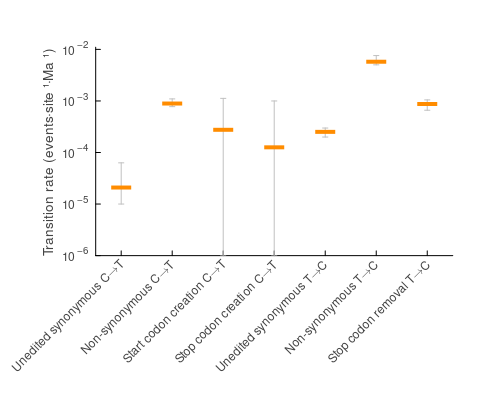

GKS: glyph missing from current font: 8315
GKS: glyph missing from current font: 8315
GKS: glyph missing from current font: 8315
GKS: glyph missing from current font: 8315


In [86]:
df = DataFrame(labels = String[], mle=Float64[], uconf = Float64[], lconf = Float64[])
for d in 1:ndims(mt_profiles)-1
    push!(df, (labels[d], conf_interval(maximum.(eachslice(mt_profiles, dims = d)), searchspaces[d])...))
end
myorder = ["Unedited synonymous C→T", "Non-synonymous C→T", "Start codon creation C→T", "Stop codon creation C→T", "Unedited synonymous T→C", "Non-synonymous T→C", "Stop codon removal T→C"]

df = df[indexin(myorder, df.labels),:]

plot(fontfamily = "Helvetica", yguide = "Transition rate (events⋅site⁻¹⋅Ma⁻¹)", guidefontsize = 9, xticks = (1:7, myorder), xr = 45, xlims = (0.5, 7.5), legend = false, size=(500,400), grid = false, margins=10mm)
scatter!(1:7,df.mle; yerror=(df.lconf, df.uconf), markershape = :hline, color = :white, ms = 3, msc = :silver, ylims = (1e-6, 1.1e-2), yscale = :log10)
scatter!(1:7,df.mle; ms = 10, msw = 5, markershape = :hline, color = colorant"#FF8C00", ylims = (1e-6, 1.1e-2), yscale = :log10)

In [87]:
savefig("mt profiles conf intervals.svg")

"/Users/ian/Documents/projects/waterferns/repository/mt profiles conf intervals.svg"

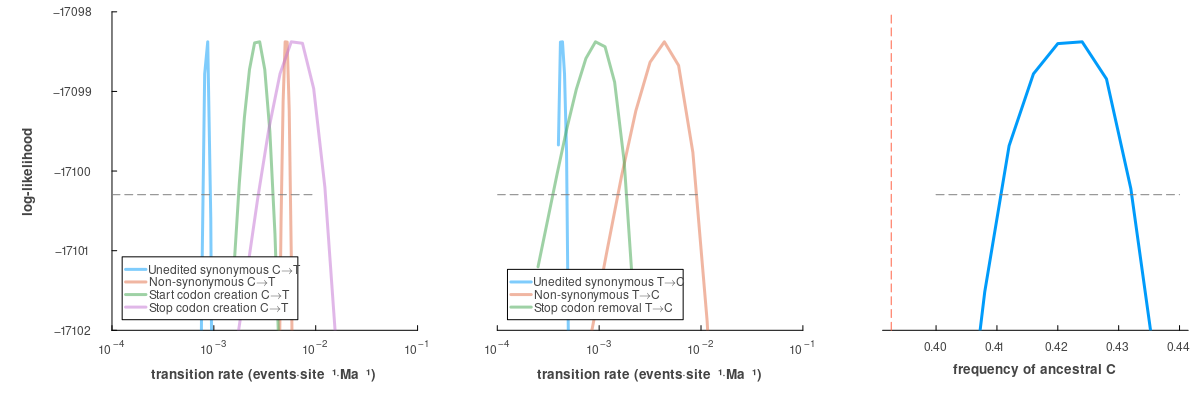

GKS: glyph missing from current font: 8315
GKS: glyph missing from current font: 8315
GKS: glyph missing from current font: 8315
GKS: glyph missing from current font: 8315
GKS: glyph missing from current font: 8315
GKS: glyph missing from current font: 8315
GKS: glyph missing from current font: 8315
GKS: glyph missing from current font: 8315


In [92]:
cp_profiles = deserialize("fully_partitioned_cp_zoom.bin")

labels = ["Unedited synonymous T→C","Unedited synonymous C→T","Non-synonymous C→T","Start codon creation C→T","Stop codon creation C→T","Non-synonymous T→C","Stop codon removal T→C"]

resolution = 11
ancestral = range(0.39,0.44; length = resolution)
searchspaces = Base.LogRange[]
push!(searchspaces, logrange(10^-3.4, 10^-3.2, resolution))
push!(searchspaces, logrange(10^-3.3, 10^-3, resolution))
push!(searchspaces, logrange(10^-2.4, 10^-2.2, resolution))
push!(searchspaces, logrange(10^-2.8, 10^-2.3, resolution))
push!(searchspaces, logrange(10^-2.9, 10^-1.8, resolution))
push!(searchspaces, logrange(10^-3.2, 10^-1.8, resolution))
push!(searchspaces, logrange(10^-3.6, 10^-2.66, resolution))

plot(;legendposition = :bottomleft, tickfontsize = 8, ylims = (-17102,-17098), layout = (1, 3), size = (1200, 400),
    xguide = "transition rate (events⋅site⁻¹⋅Ma⁻¹)", fontfamily = "Helvetica", guidefontfamily = "Helvetica Bold", guidefontsize = 9, grid = false, bottom_margin = 10mm)
plot!(; subplot = 1, xscale = :log10, xlims = (1e-4, 1e-1), yguide = "log-likelihood", left_margin = 10mm)
plot!(; subplot = 2, xscale = :log10, xlims = (1e-4, 1e-1), yaxis = false)
plot!(; subplot = 3, yaxis = false)
for d in 1:ndims(mt_profiles)-1
    subplot = 1
    if d ∈ [1,6,7]
        subplot = 2
    end
    plot!(searchspaces[d], maximum.(eachslice(cp_profiles, dims = d)); subplot=subplot, lw = 3, alpha = 0.5, label = labels[d])
end
plot!([1e-5, 1e-2],[maximum(cp_profiles) - 1.92, maximum(cp_profiles) - 1.92]; ls = :dash, color = :gray, label = false)
plot!([1e-5, 1e-2],[maximum(cp_profiles) - 1.92, maximum(cp_profiles) - 1.92]; subplot=2, ls = :dash, color = :gray, label = false)

d = 8
domain = range(0.40,0.44; length = resolution)
plot!(domain, maximum.(eachslice(cp_profiles, dims = d)); subplot = 3, lw = 3, xguide = "frequency of ancestral C", label = false)
plot!([0.40,0.44],[maximum(cp_profiles) - 1.92, maximum(cp_profiles) - 1.92]; subplot = 3, ls = :dash, color = :gray, label = false)
vline!([0.3926354453627181]; subplot = 3, ls = :dash, color = :tomato, label = false)

In [93]:
savefig("cp profiles.svg")

"/Users/ian/Documents/projects/waterferns/repository/cp profiles.svg"

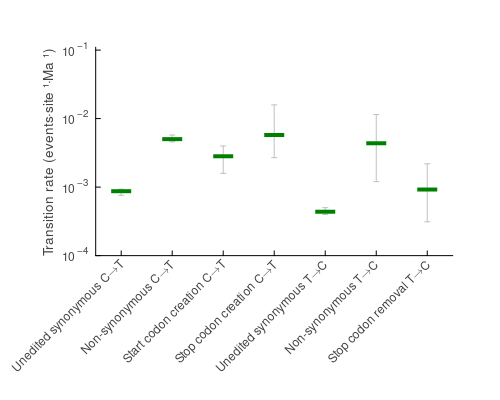

GKS: glyph missing from current font: 8315
GKS: glyph missing from current font: 8315
GKS: glyph missing from current font: 8315
GKS: glyph missing from current font: 8315


In [96]:
df = DataFrame(labels = String[], mle=Float64[], uconf = Float64[], lconf = Float64[])
for d in 1:ndims(cp_profiles)-1
    push!(df, (labels[d], conf_interval(maximum.(eachslice(cp_profiles, dims = d)), searchspaces[d])...))
end
myorder = ["Unedited synonymous C→T", "Non-synonymous C→T", "Start codon creation C→T", "Stop codon creation C→T", "Unedited synonymous T→C", "Non-synonymous T→C", "Stop codon removal T→C"]

df = df[indexin(myorder, df.labels),:]

plot(fontfamily = "Helvetica", yguide = "Transition rate (events⋅site⁻¹⋅Ma⁻¹)", guidefontsize = 9, xticks = (1:7, myorder), xr = 45, xlims = (0.5, 7.5), legend = false, size=(500,400), grid = false, margins=10mm)
scatter!(1:7,df.mle; yerror=(df.lconf, df.uconf), markershape = :hline, color = :white, ms = 3, msc = :silver, ylims = (1e-4, 1.1e-1), yscale = :log10)
scatter!(1:7,df.mle; ms = 10, msw = 5, markershape = :hline, color = colorant"#008000", ylims = (1e-4, 1.1e-1), yscale = :log10, yticks = (logrange(1e-4,1e-1,4)))

In [97]:
savefig("cp profiles conf intervals.svg")

"/Users/ian/Documents/projects/waterferns/repository/cp profiles conf intervals.svg"